In [64]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

# Настройки
np.random.seed(42)
plt.rcParams['figure.figsize'] = (12, 6)

In [65]:
def coin_toss(p=0.5):
    return (np.random.rand() < p) * 1

In [66]:
def model(p):
    res = []
    for i in range(100):
        res.append(coin_toss(p))
    return res

In [67]:
def find_max_series(sequence):
    max_streak = 0
    current_streak = 0
    
    for toss in sequence:
        if toss == 1:
            current_streak += 1
            max_streak = max(max_streak, current_streak)
        else:
            current_streak = 0
    
    return max_streak

In [68]:
mean = []
interval = []
series_5 = []
mean_max_streak = []

n = 10000

p_range = np.linspace(0.05, 0.95, 19)

for p in p_range:
    results = np.zeros(n)
    series_5_ = np.zeros(n)
    max_streaks = np.zeros(n)

    for i in range(n):
        experiment = model(p)
        results[i] = np.sum(experiment)
        max_streak = find_max_series(experiment)
        max_streaks[i] = max_streak
        if max_streak >= 5:
            series_5_[i] = 1  
        else:
             series_5_[i] = 0

    mean.append(np.mean(results))

    lower = np.percentile(results, 2.5)
    upper = np.percentile(results, 97.5)
    width = upper - lower
    interval.append(width)

    series_5.append(np.mean(series_5_))
    
    mean_max_streak.append(np.mean(max_streaks))

In [69]:
p_05_index = np.argmin(np.abs(p_range - 0.5))

print(f"1. Среднее число орлов: {mean[p_05_index]:.2f}")
print(f"2. Вероятность получить > 60 орлов: {np.mean(results_p05 > 60):.6f}")

1. Среднее число орлов: 50.00
2. Вероятность получить > 60 орлов: 0.017500


In [70]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print("\nВероятности по интервалам:")
for i in range(len(bins)-1):
    mask = (results_p05 >= bins[i]) & (results_p05 < bins[i+1])
    prob = np.mean(mask)
    print(f"Интервал [{bins[i]}, {bins[i+1]}): {prob:.4f}")

# Последний интервал
mask = (results_p05 >= 90) & (results_p05 <= 100)
prob = np.mean(mask)
print(f"Интервал [90, 100]: {prob:.4f}")


Вероятности по интервалам:
Интервал [0, 10): 0.0000
Интервал [10, 20): 0.0000
Интервал [20, 30): 0.0000
Интервал [30, 40): 0.0174
Интервал [40, 50): 0.4376
Интервал [50, 60): 0.5156
Интервал [60, 70): 0.0293
Интервал [70, 80): 0.0001
Интервал [80, 90): 0.0000
Интервал [90, 100): 0.0000
Интервал [90, 100]: 0.0000


In [57]:
lower = np.percentile(results_p05, 2.5)
upper = np.percentile(results_p05, 97.5)
width = upper - lower
print(f"\n95% интервал: [{lower:.1f}, {upper:.1f}]")
print(f"Ширина интервала: {width:.1f}")


95% интервал: [40.0, 60.0]
Ширина интервала: 20.0


In [60]:
print(f"\nВероятность серии из 5 орлов: {np.mean(series):.4f}")


Вероятность серии из 5 орлов: 0.8092


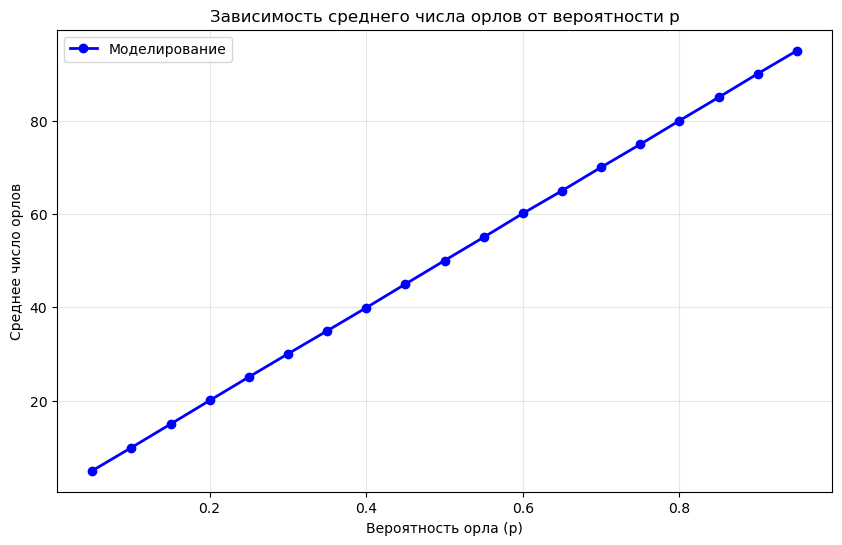

In [63]:
plt.figure(figsize=(10, 6))
plt.plot(p_range, mean, 'bo-', linewidth=2, markersize=6, label='Моделирование')
theoretical = [100 * p for p in p_range]
plt.xlabel('Вероятность орла (p)')
plt.ylabel('Среднее число орлов')
plt.title('Зависимость среднего числа орлов от вероятности p')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

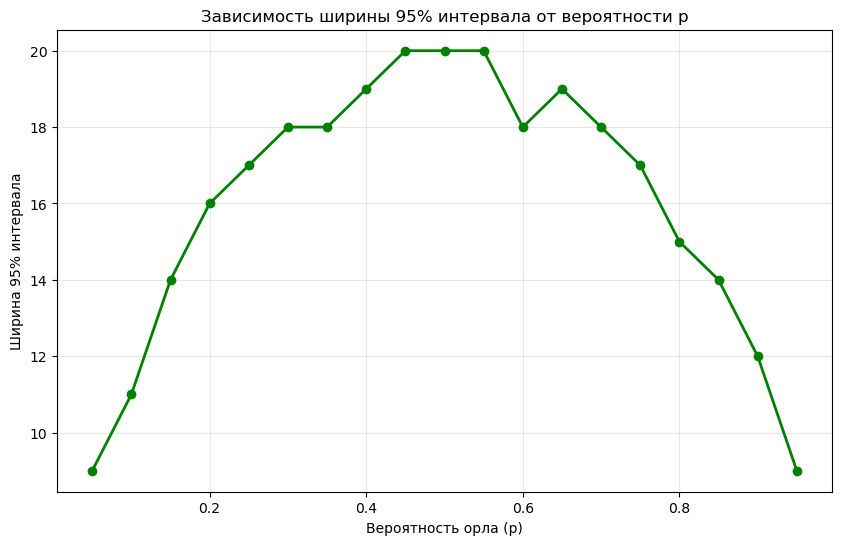

In [44]:
plt.figure(figsize=(10, 6))
plt.plot(p_range, interval_width_arr, 'go-', linewidth=2, markersize=6)
plt.xlabel('Вероятность орла (p)')
plt.ylabel('Ширина 95% интервала')
plt.title('Зависимость ширины 95% интервала от вероятности p')
plt.grid(True, alpha=0.3)
plt.show()

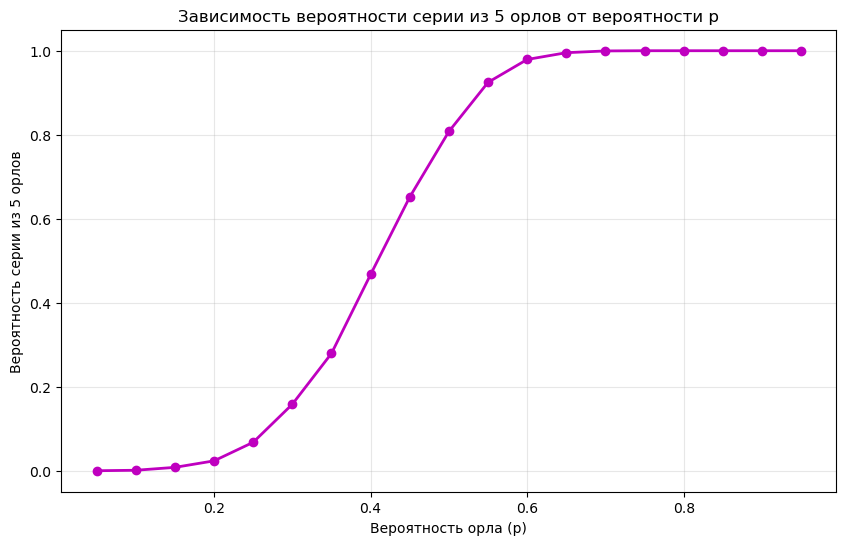

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(p_range, prob_series_5_arr, 'mo-', linewidth=2, markersize=6)
plt.xlabel('Вероятность орла (p)')
plt.ylabel('Вероятность серии из 5 орлов')
plt.title('Зависимость вероятности серии из 5 орлов от вероятности p')
plt.grid(True, alpha=0.3)
plt.show()

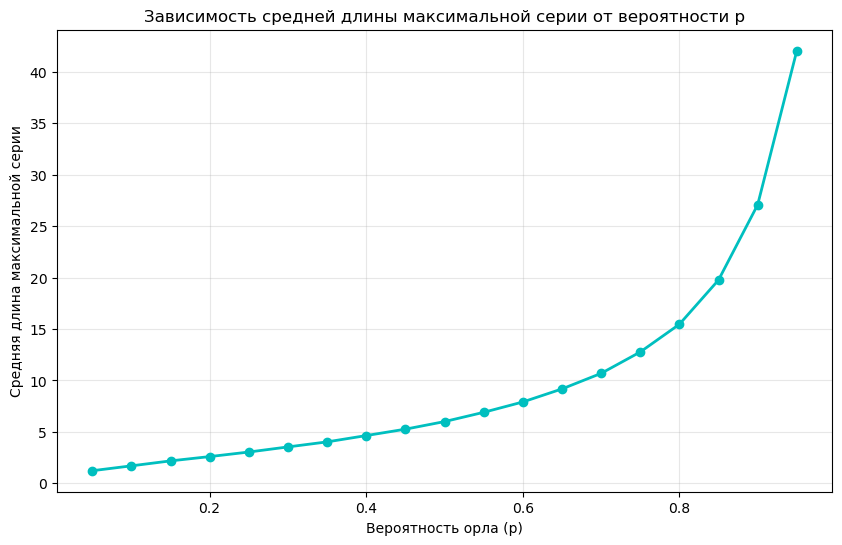

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(p_range, mean_max_streak_arr, 'co-', linewidth=2, markersize=6)
plt.xlabel('Вероятность орла (p)')
plt.ylabel('Средняя длина максимальной серии')
plt.title('Зависимость средней длины максимальной серии от вероятности p')
plt.grid(True, alpha=0.3)
plt.show()